In [1]:
library(LinRegInteractive)
data(munichrent03)
#?munichrent03
data <- munichrent03 

Loading required package: rpanel

Loading required package: tcltk

Package `rpanel', version 1.1-5: type help(rpanel) for summary information

Loading required package: xtable



In [2]:
head(data,5)

,rent,rentsqm,area,rooms,yearc,bathextra,bathtile,cheating,district,location,upkitchen,wwater
,<dbl>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<ord>,<fct>,<fct>
1,741.39,10.90,68,2,1918,no,yes,yes,Lud-Isar,good,no,yes
2,715.82,11.01,65,2,1995,no,yes,yes,Lud-Isar,good,no,yes
3,528.25,8.38,63,3,1918,no,yes,yes,Lud-Isar,good,no,yes
4,553.99,8.52,65,3,1983,yes,yes,yes,Ram-Per,normal,no,yes
5,698.21,6.98,100,4,1995,yes,yes,yes,Ram-Per,good,yes,yes


In [3]:
str(data)

'data.frame':	2053 obs. of  12 variables:
 $ rent     : num  741 716 528 554 698 ...
 $ rentsqm  : num  10.9 11.01 8.38 8.52 6.98 ...
 $ area     : int  68 65 63 65 100 81 55 79 52 77 ...
 $ rooms    : int  2 2 3 3 4 4 2 3 1 3 ...
 $ yearc    : num  1918 1995 1918 1983 1995 ...
 $ bathextra: Factor w/ 2 levels "no","yes": 1 1 1 2 2 1 2 1 1 1 ...
 $ bathtile : Factor w/ 2 levels "yes","no": 1 1 1 1 1 1 1 1 1 1 ...
 $ cheating : Factor w/ 2 levels "yes","no": 1 1 1 1 1 1 1 1 1 1 ...
 $ district : Factor w/ 25 levels "All-Umenz","Alt-Le",..: 10 10 10 17 17 17 21 21 21 21 ...
 $ location : Ord.factor w/ 3 levels "normal"<"good"<..: 2 2 2 1 2 1 1 1 1 1 ...
 $ upkitchen: Factor w/ 2 levels "no","yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ wwater   : Factor w/ 2 levels "yes","no": 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
names(data)

[1] "rent"      "rentsqm"   "area"      "rooms"     "yearc"     "bathextra"
 [7] "bathtile"  "cheating"  "district"  "location"  "upkitchen" "wwater"

In [5]:
summary(data)

      rent            rentsqm            area           rooms      
 Min.   :  77.31   Min.   : 1.470   Min.   : 17.0   Min.   :1.000  
 1st Qu.: 389.95   1st Qu.: 6.800   1st Qu.: 53.0   1st Qu.:2.000  
 Median : 534.30   Median : 8.470   Median : 67.0   Median :3.000  
 Mean   : 570.09   Mean   : 8.394   Mean   : 69.6   Mean   :2.598  
 3rd Qu.: 700.48   3rd Qu.:10.090   3rd Qu.: 83.0   3rd Qu.:3.000  
 Max.   :1789.55   Max.   :20.090   Max.   :185.0   Max.   :6.000  
                                                                   
     yearc      bathextra  bathtile   cheating        district      location   
 Min.   :1918   no :1862   yes:1673   yes:1878   Neuh-Nymp: 177   normal:1205  
 1st Qu.:1948   yes: 191   no : 380   no : 175   Lud-Isar : 161   good  : 803  
 Median :1960                                    Au-Haid  : 139   top   :  45  
 Mean   :1958                                    SchwWest : 137                
 3rd Qu.:1973                                    Maxvor 

In [6]:
round(data$rent[100]/data$area[100],2) #compute rentsqm
data$rentsqm[100]

[1] 11.3

[1] 11.3

In [7]:
data$rentsqm <- NULL

In [8]:
head(sort(table(data$district), decreasing = TRUE), 7)


Neuh-Nymp  Lud-Isar   Au-Haid  SchwWest    Maxvor      Laim   Ram-Per 
      177       161       139       137       132       117       115 

In [9]:
head(sort(table(data$district[data$location %in% c("top", "good")]),decreasing = TRUE),7)


     Maxvor   Neuh-Nymp    Lud-Isar    SchwWest     Au-Haid Schwab-Frei 
        118         116          97          96          81          50 
   Trud-Rie 
         37 

In [10]:
library(dplyr)
cols <- c("bathextra", "bathtile", "cheating", "upkitchen", "wwater")
total_n <- nrow(data)
feature_yes_count <- sapply(cols, function(col) {
  sum(data[[col]] == "yes", na.rm = TRUE)
}) |> unname()
feature_summary <- data.frame(
  Feature = cols,
  Count = as.integer(feature_yes_count),
  Percent = round(100 * feature_yes_count / total_n, 1)
)
print(feature_summary)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




    Feature Count Percent
1 bathextra   191     9.3
2  bathtile  1673    81.5
3  cheating  1878    91.5
4 upkitchen   150     7.3
5    wwater  1981    96.5


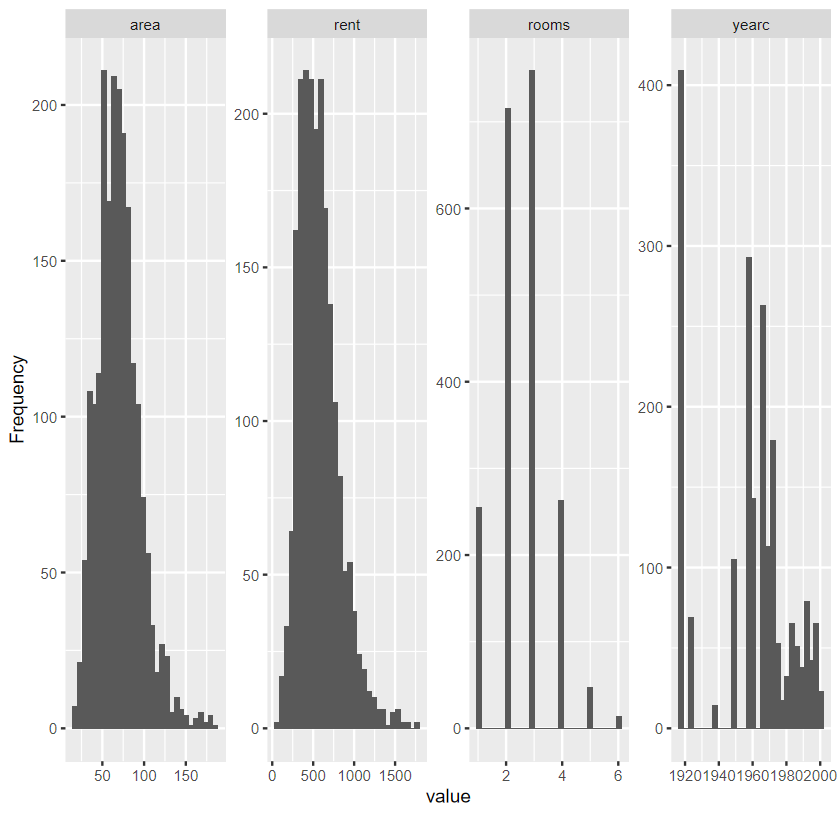

In [11]:
library(DataExplorer)
plot_histogram(data)

In [12]:
table(data$room)
table(data$yearc)


  1   2   3   4   5   6 
255 715 759 263  47  14 


  1918   1924   1939   1948   1957 1957.5   1960   1966   1967   1968   1969 
   409     69     14    105    225     68    143    228     35     23     44 
  1970   1971   1972   1973   1974   1975   1976   1977   1978   1979   1980 
    46     35     89     55     30     16      7      6      5      6     17 
  1981   1982   1983   1984   1985   1986   1987   1988   1989   1990   1991 
    15      8     40     17     20     11     20     13     15     10     14 
  1992   1993   1994   1995   1996   1997   1998 1998.5   1999   2000   2001 
    24     41     13      9     20     12     14     32      7     18      5 

In [13]:
names(data[-c(1,2,3,4,8,9)])

[1] "bathextra" "bathtile"  "cheating"  "upkitchen" "wwater"

In [14]:
library(gRbase)
library(Rgraphviz)
library(bnlearn)
library(gRain)
library(ggm)
library(igraph)
options(warn = -1)

Loading required package: graph

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'graph'


The following objects are masked from 'package:gRbase':

    addEdge, adj, connComp, edges, nodes, removeEdge, subGraph


Loading required package: grid


Attaching package: 'bnlearn'


The following objects are maske

In [15]:
data$rooms <- as.factor(data$rooms)
data$location <- as.factor(as.character(data$location))

In [16]:
data$yearc <- round(data$yearc)
data$year_group <- cut(data$yearc,
  breaks = c(1917, 1959, 1969, 1989, 2001),
  labels = c("1918-1959", "1960-1969", "1970-1989", "1990-2001"),right = TRUE)
length(data$year_group) == nrow(data)
table(data$year_group)

[1] TRUE


1918-1959 1960-1969 1970-1989 1990-2001 
      890       473       471       219 

In [17]:
district_counts <- sort(table(data$district), decreasing = TRUE)
district_counts
district_ordered <- names(district_counts)


     Neuh-Nymp       Lud-Isar        Au-Haid       SchwWest         Maxvor 
           177            161            139            137            132 
          Laim        Ram-Per Th-Ob-Fo-Fu-So         Bogenh      Ugies-Har 
           117            115            106             98             82 
   Schwab-Frei        Mil-AmH      Send-West         Obgies           Send 
            78             70             69             67             66 
      Schwanth        BamLaim           Moos     Pas-Obmenz            Had 
            62             60             58             56             50 
        Alt-Le       Trud-Rie       Feld-Has       Au-Lo-La      All-Umenz 
            43             43             29             24             14 

Area 1:

In [18]:
area1_index <- c(1, 2, 3, 4, 5, 6, 9 ,11, 12, 16, 21)
district_ordered[area1_index]

[1] "Neuh-Nymp"   "Lud-Isar"    "Au-Haid"     "SchwWest"    "Maxvor"     
 [6] "Laim"        "Bogenh"      "Schwab-Frei" "Mil-AmH"     "Schwanth"   
[11] "Alt-Le"

Area 2:

In [19]:
area2_index <- c(7, 8, 10, 13, 14, 15, 17, 20, 22)
district_ordered[area2_index]

[1] "Ram-Per"        "Th-Ob-Fo-Fu-So" "Ugies-Har"      "Send-West"     
[5] "Obgies"         "Send"           "BamLaim"        "Had"           
[9] "Trud-Rie"

Area 3:

In [20]:
area3_index <- setdiff(1:length(district_ordered), c(area1_index, area2_index))
district_ordered[area3_index]

[1] "Moos"       "Pas-Obmenz" "Feld-Has"   "Au-Lo-La"   "All-Umenz"

In [21]:
district_group_info <- data.frame(district = district_ordered,
                                  group = NA)
district_group_info$group[area1_index] <- "Area1"
district_group_info$group[area2_index] <- "Area2"
district_group_info$group[area3_index] <- "Area3"
data$district_group <- 
  district_group_info$group[match(data$district, district_group_info$district)]
data$district_group <- as.factor(data$district_group)
sum(table(data$district_group)) == nrow(data)

[1] TRUE

In [22]:
data_bn <- data[, !(names(data) %in% c("yearc", "district"))]
data_bn$rent <- as.numeric(data_bn$rent)
data_bn$area <- as.numeric(data_bn$area)

In [23]:
data_disc <- discretize(data_bn, method = "hartemink",breaks = 3,ibreaks = 60,
                        idisc = "quantile")

In [24]:
table(data_disc$rent)
table(data_disc$area)


  [77.31,406.132] (406.132,687.072] (687.072,1789.55] 
              582               923               548 


 [17,44]  (44,78] (78,185] 
     307     1086      660 

In [25]:
str(data_disc)

'data.frame':	2053 obs. of  11 variables:
 $ rent          : Factor w/ 3 levels "[77.31,406.132]",..: 3 3 2 2 3 3 1 2 2 1 ...
 $ area          : Factor w/ 3 levels "[17,44]","(44,78]",..: 2 2 2 2 3 3 2 3 2 2 ...
 $ rooms         : Factor w/ 6 levels "1","2","3","4",..: 2 2 3 3 4 4 2 3 1 3 ...
 $ bathextra     : Factor w/ 2 levels "no","yes": 1 1 1 2 2 1 2 1 1 1 ...
 $ bathtile      : Factor w/ 2 levels "yes","no": 1 1 1 1 1 1 1 1 1 1 ...
 $ cheating      : Factor w/ 2 levels "yes","no": 1 1 1 1 1 1 1 1 1 1 ...
 $ location      : Factor w/ 3 levels "good","normal",..: 1 1 1 2 1 2 2 2 2 2 ...
 $ upkitchen     : Factor w/ 2 levels "no","yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ wwater        : Factor w/ 2 levels "yes","no": 1 1 1 1 1 1 1 1 1 1 ...
 $ year_group    : Factor w/ 4 levels "1918-1959","1960-1969",..: 1 4 1 3 4 3 1 1 1 1 ...
 $ district_group: Factor w/ 3 levels "Area1","Area2",..: 1 1 1 2 2 2 2 2 2 2 ...


In [26]:
set.seed(42)
boot_pc <- boot.strength(data = data_disc, R = 500, algorithm = "pc.stable",
                         algorithm.args = list(test = "mi"))
boot_hc <- boot.strength(data = data_disc, R = 500, algorithm = "hc", 
                         algorithm.args = list(score = "bic"))
boot_mmhc <- boot.strength(data = data_disc, R = 500, algorithm = "mmhc")

In [27]:
avgnet_pc <- averaged.network(boot_pc[boot_pc$direction>=0.5,],threshold = 0.85)
avgnet_hc <- averaged.network(boot_hc[boot_hc$direction>=0.5,],threshold = 0.85)
avgnet_mmhc <- averaged.network(boot_mmhc[boot_mmhc$direction>=0.5,],threshold = 0.55)

In [28]:
mean_strength <- function(strength, DAG) 
  {arcs_net <- arcs(DAG)
  matched_strength <- strength[
    apply(strength[, c("from", "to")], 1, function(x)
      any(apply(arcs_net, 1, function(y) all(x == y)))
    ),]
  mean(matched_strength$strength)
  }
results <- data.frame(
  Algorithm = c("pc.stable", "hc", "mmhc"),
  BIC = c(score(avgnet_pc,   data = data_disc, type = "bic"),
          score(avgnet_hc,   data = data_disc, type = "bic"),
          score(avgnet_mmhc, data = data_disc, type = "bic")),  
  Egdes=c(dim(arcs(avgnet_pc))[1],
          dim(arcs(avgnet_hc))[1],
          dim(arcs(avgnet_mmhc))[1]),
  Mean_Strength = c(mean_strength(boot_pc,   avgnet_pc),
                    mean_strength(boot_hc,   avgnet_hc),
                    mean_strength(boot_mmhc, avgnet_mmhc))
  )
results

Algorithm,BIC,Egdes,Mean_Strength
<chr>,<dbl>,<int>,<dbl>
pc.stable,-14943.23,4,0.9970000
hc,-14191.93,9,0.9815556
mmhc,-14290.91,7,0.9734286


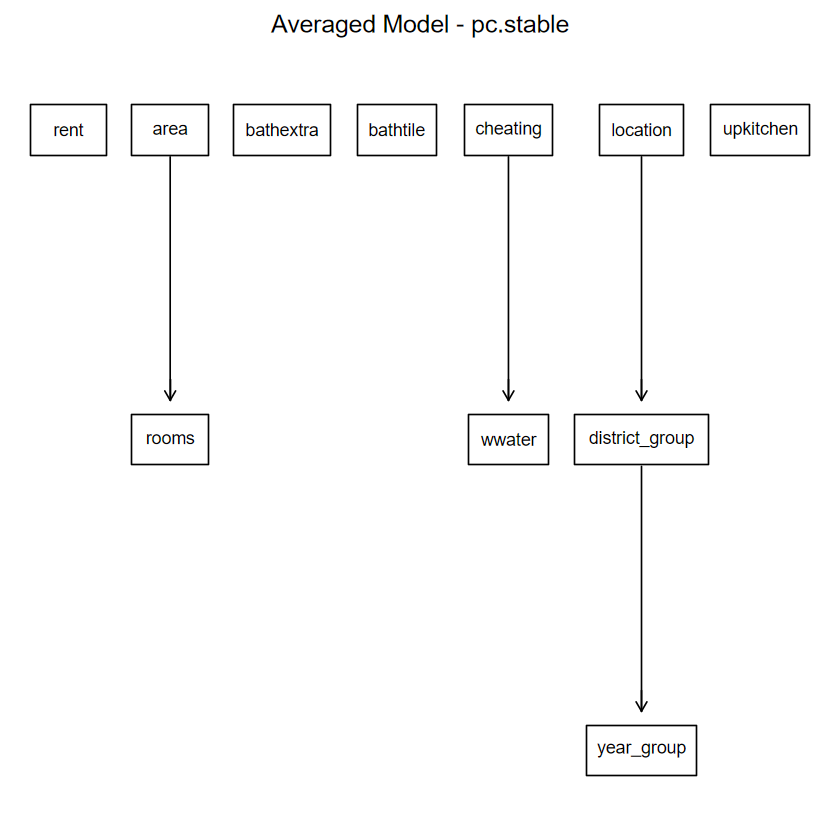

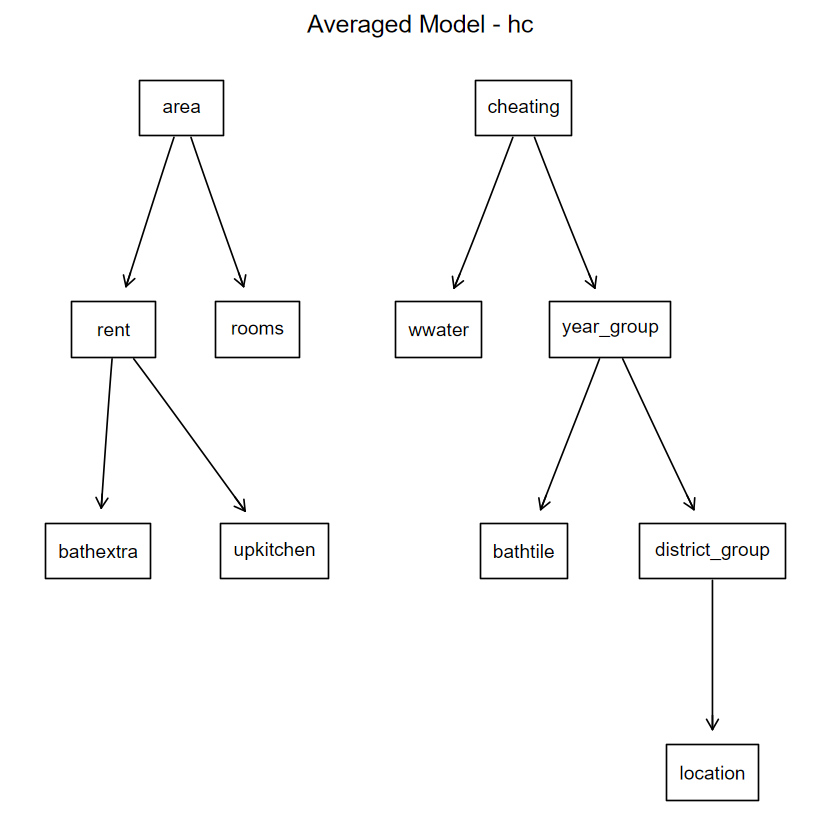

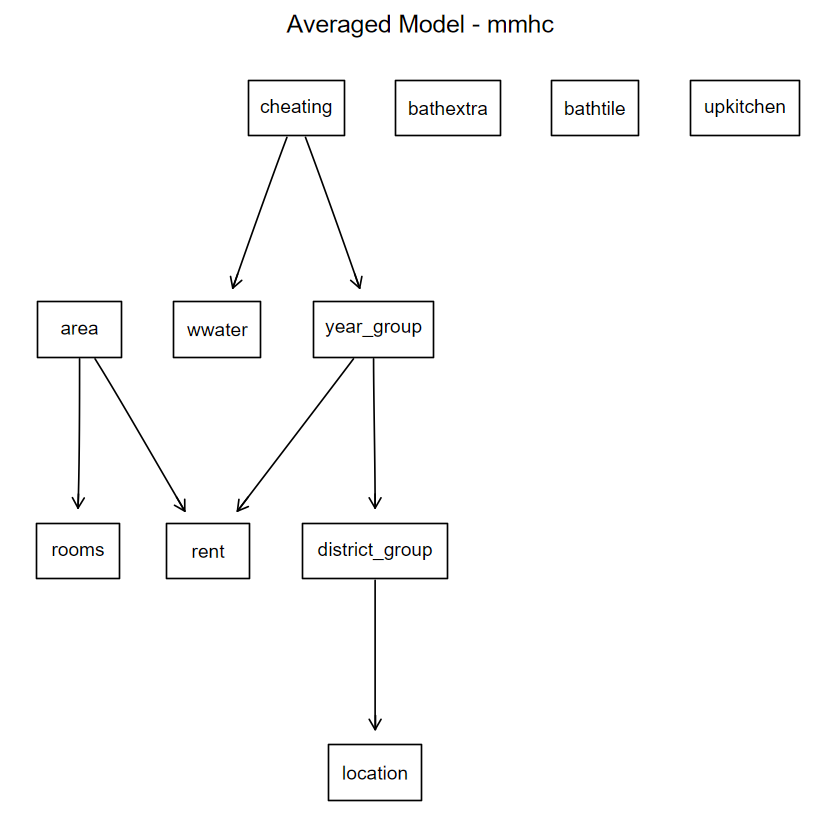

In [29]:
graphviz.plot(avgnet_pc, main = "Averaged Model - pc.stable")
graphviz.plot(avgnet_hc, main = "Averaged Model - hc")
graphviz.plot(avgnet_mmhc, main = "Averaged Model - mmhc")

In [30]:
avgnet_pc <- averaged.network(boot_pc[boot_pc$direction>=0.5,], threshold = 0.75)
avgnet_hc <- averaged.network(boot_hc[boot_hc$direction>=0.5,],threshold = 0.75)
avgnet_mmhc <- averaged.network(boot_mmhc[boot_mmhc$direction>=0.5,], threshold = 0.75)

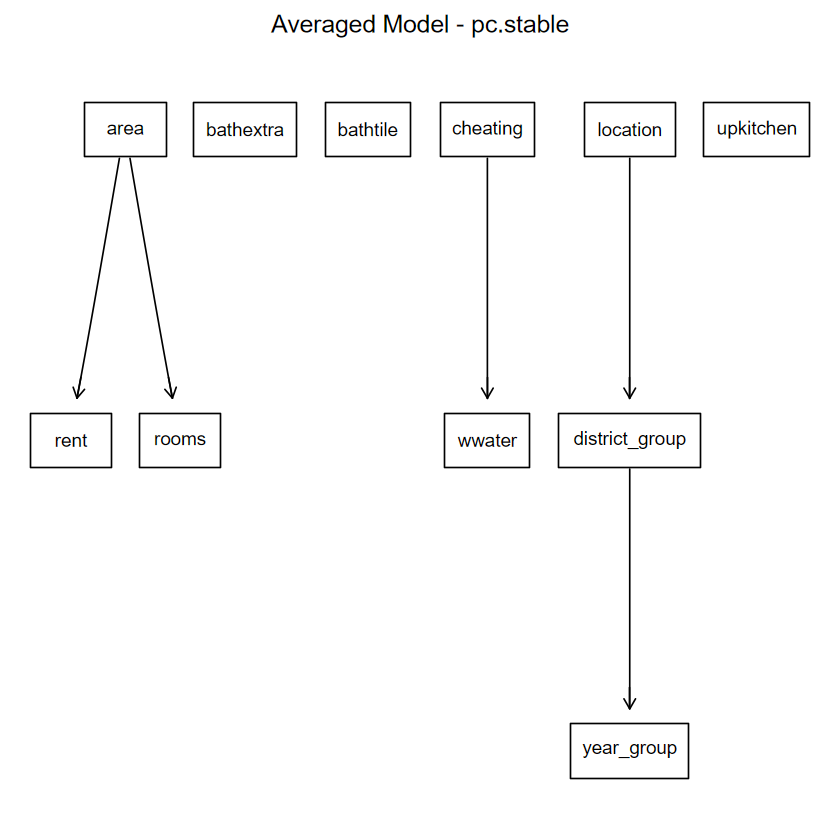

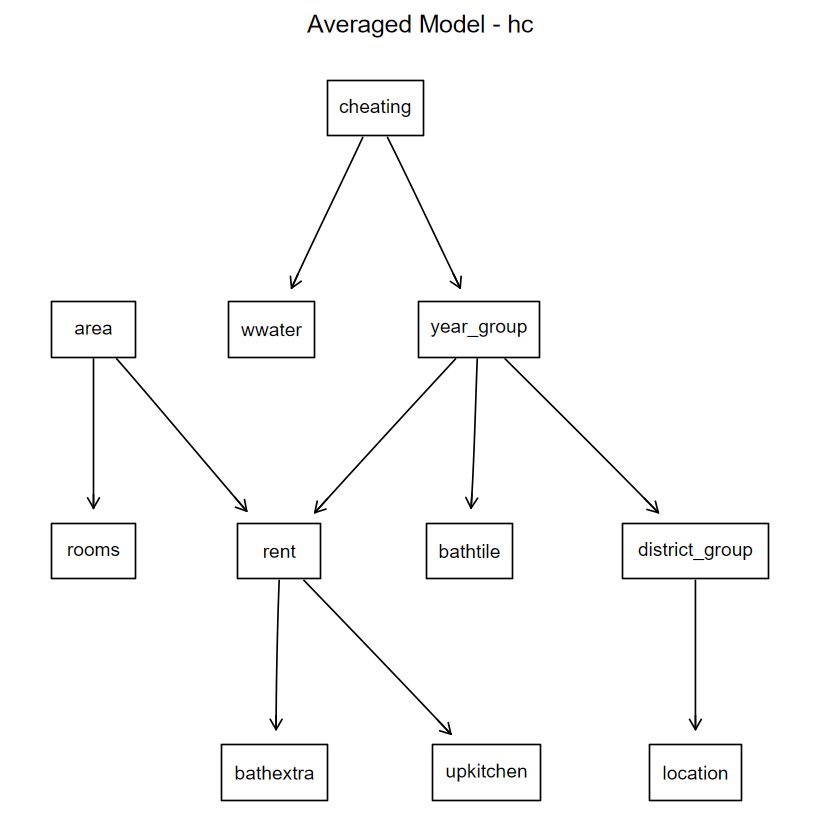

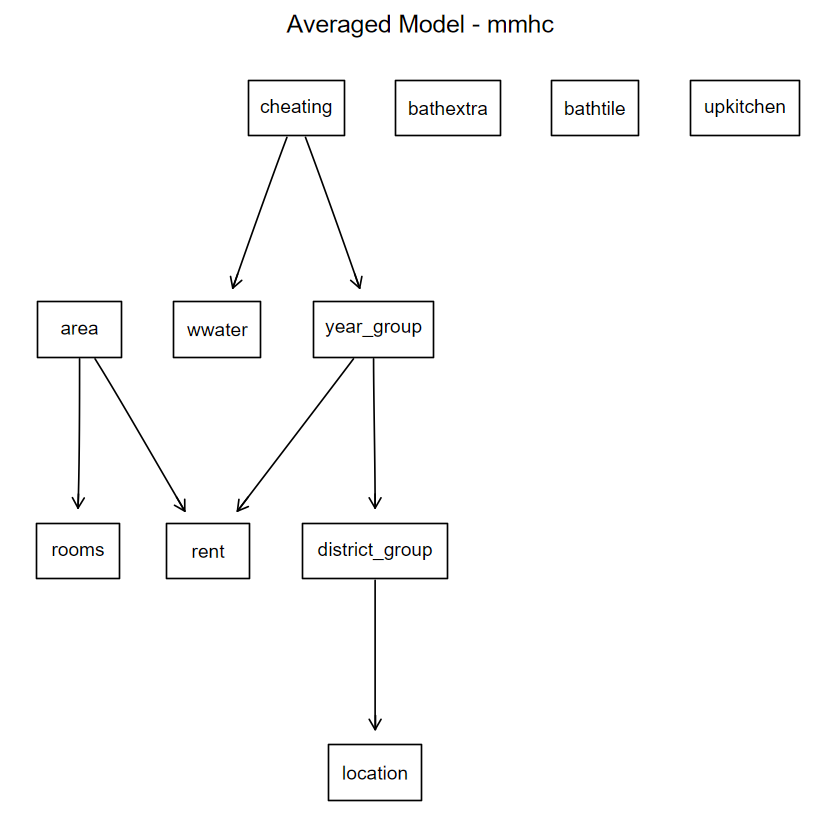

In [31]:
graphviz.plot(avgnet_pc, main = "Averaged Model - pc.stable")
graphviz.plot(avgnet_hc, main = "Averaged Model - hc")
graphviz.plot(avgnet_mmhc, main = "Averaged Model - mmhc")

In [32]:
results <- data.frame(
  Algorithm = c("pc.stable", "hc", "mmhc"),
  BIC = c(score(avgnet_pc,   data = data_disc, type = "bic"),
          score(avgnet_hc,   data = data_disc, type = "bic"),
          score(avgnet_mmhc, data = data_disc, type = "bic")),  
  Egdes=c(dim(arcs(avgnet_pc))[1],
          dim(arcs(avgnet_hc))[1],
          dim(arcs(avgnet_mmhc))[1]),
  Mean_Strength = c(mean_strength(boot_pc,   avgnet_pc),
                    mean_strength(boot_hc,   avgnet_hc),
                    mean_strength(boot_mmhc, avgnet_mmhc))
  )
results

Algorithm,BIC,Egdes,Mean_Strength
<chr>,<dbl>,<int>,<dbl>
pc.stable,-14450.33,5,0.9664000
hc,-14149.04,10,0.9624000
mmhc,-14290.91,7,0.9734286


hc(75%)

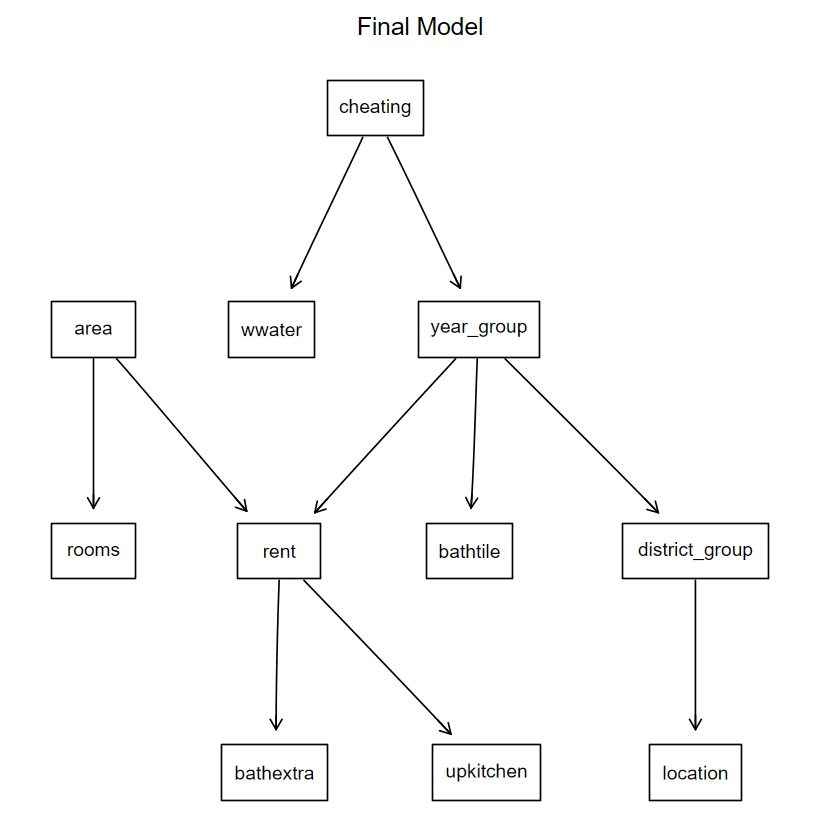

In [33]:
graphviz.plot(avgnet_hc, main = "Final Model")

In [34]:
final_mod_dag=averaged.network(boot_hc[boot_hc$direction>=0.5,],threshold = 0.75)

In [35]:
fit = bn.fit(final_mod_dag, data = data_disc, method = "mle")

In [36]:
has_na <- sapply(fit, function(node) any(is.na(unlist(node$prob))))

In [37]:
has_na

rent           area          rooms      bathextra       bathtile 
         FALSE          FALSE          FALSE          FALSE          FALSE 
      cheating       location      upkitchen         wwater     year_group 
         FALSE          FALSE          FALSE          FALSE          FALSE 
district_group 
         FALSE

See a few conditional probability tables for selected variables

In [53]:
fit$rooms
fit$location


  Parameters of node rooms (multinomial distribution)

Conditional probability table:
 
     area
rooms     [17,44]     (44,78]    (78,185]
    1 0.736156352 0.025782689 0.001515152
    2 0.263843648 0.565377532 0.030303030
    3 0.000000000 0.390423573 0.507575758
    4 0.000000000 0.018416206 0.368181818
    5 0.000000000 0.000000000 0.071212121
    6 0.000000000 0.000000000 0.021212121


  Parameters of node location (multinomial distribution)

Conditional probability table:
 
        district_group
location       Area1       Area2       Area3
  good   0.514827018 0.224924012 0.165745856
  normal 0.464579901 0.746200608 0.828729282
  top    0.020593081 0.028875380 0.005524862

In [54]:
dsep(fit,x="rooms",y="rent",z="area")

[1] TRUE

$$
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$

$$
  \mathbb{P}(X>1)=\int_{1}^{\infty}\frac{x}{2}dx
$$